# Bank Marketing Analytics Dataset

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as  sns

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
url='https://drive.google.com/file/d/132H1QpkXz1BHEOSiBsRWrO0Skeb4x3Sc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep=';', index_col=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no


In [ ]:
#check the shape of the data set
df.shape

(41188, 21)

In [ ]:
# data column names need to be formatting. Replacing the . with underscore
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#rename the column names with _ to use for anlysys if the names are confusing
df_rename=df.rename ({'emp.var.rate': 'emp_var_rate', 'cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx' , 'nr.employed':'nr_employed'}, axis=1)

In [ ]:
df_rename.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no


In [ ]:
# Review the statistical details of the data avaialble
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,188.00","41,188.00","41,188.00","41,188.00","41,188.00","41,188.00","41,188.00","41,188.00","41,188.00","41,188.00"
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,"5,167.04"
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,"4,963.60"
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,"5,099.10"
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,"5,191.00"
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,"5,228.10"
max,98.00,"4,918.00",56.00,999.00,7.00,1.40,94.77,-26.90,5.04,"5,228.10"


In [ ]:
# Review data types and null status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#check before treating 'unknown's
df_unknown_check=df[df['education']=='unknown']
df_unknown_check

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.10,94.77,-50.80,1.05,"4,963.60",no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.05,"4,963.60",no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.10,94.77,-50.80,1.05,"4,963.60",yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.10,94.77,-50.80,1.04,"4,963.60",no


In [ ]:
# As per the data set description, there are some categorical attributes entered as  'unknown' . We will replace them with the mode of each catogory
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].replace('unknown',mode)

In [ ]:
#check after treating 'unknown's
df_unknown_check=df[df['education']=='unknown']
df_unknown_check


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
# I would like to explore what is the link between 'poutcome' and 'y'. I'm assuming failiure and nonexistent are considered as no and success is yes. 

df_outcome=df[['poutcome','y']].value_counts()
df_outcome

poutcome     y  
nonexistent  no     32422
failure      no      3647
nonexistent  yes     3141
success      yes      894
failure      yes      605
success      no       479
dtype: int64

In [ ]:
# based on above analysis 'poutcome' column which represent the outcome of the previous marketting campaign will not provide a correct insight into if the customer accepted the offer or not.
# So we can drop this column and create df1. Since this dataframe is contain only 41k row, we do not have to worry about filtering this out in our analysis. 
df1=df.drop('poutcome', axis=1)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.10,93.99,-36.40,4.86,"5,191.00",no


** Delete before submitting - Start of Nishika's analysis **

---



## Bivariate Data Analysis 


1.   Bivariate Analysis of continuous variables 

In [ ]:
df_dum=pd.get_dummies(df, columns=['y'])


In [ ]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]


Text(0.5, 1.0, 'Heatmap for Bivariate Analysis')

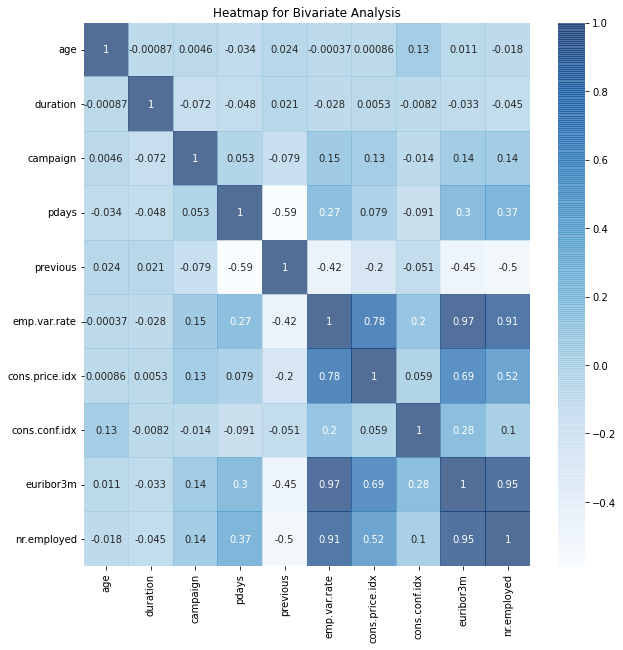

In [ ]:
# check if there is a correlation between variables. 
c=df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(c, annot=True ,cmap='Blues', alpha=.7)
plt.title('Heatmap for Bivariate Analysis')


In [ ]:
df['euribor3m'].describe()

count   41,188.00
mean         3.62
std          1.73
min          0.63
25%          1.34
50%          4.86
75%          4.96
max          5.04
Name: euribor3m, dtype: float64

In [ ]:
df['cons.price.idx'].describe()

count   41,188.00
mean        93.58
std          0.58
min         92.20
25%         93.08
50%         93.75
75%         93.99
max         94.77
Name: cons.price.idx, dtype: float64

There is a very high variance of euribor3m rate. min value is 0.63 and mean is 3.62 50th and 75th quatiles is at 4.86 and 4.96. so it is highly right skewed. cons.price.idx has a relatively small std. We do not have further details on how banck calcuted this figure. Both these factors can affect by market factors as well. 

From this heatmap we can see there are some significant correlations between some variables. We can consider any correlation >=0.5 or <=0.5 are significant. However we will not include 'euribor3m' and 'cons_price_idx' in this analysis, but can be used in any futyre analysis with machine leaning approach. We will explore more on 'pdays' vs 'previous' , 'nr.employed' vs 'previous', emp.var.rate' vs 'nr.employed'. 


Text(0.5, 1.0, 'Pairplot: View The Relationships Between Numerical Variables')

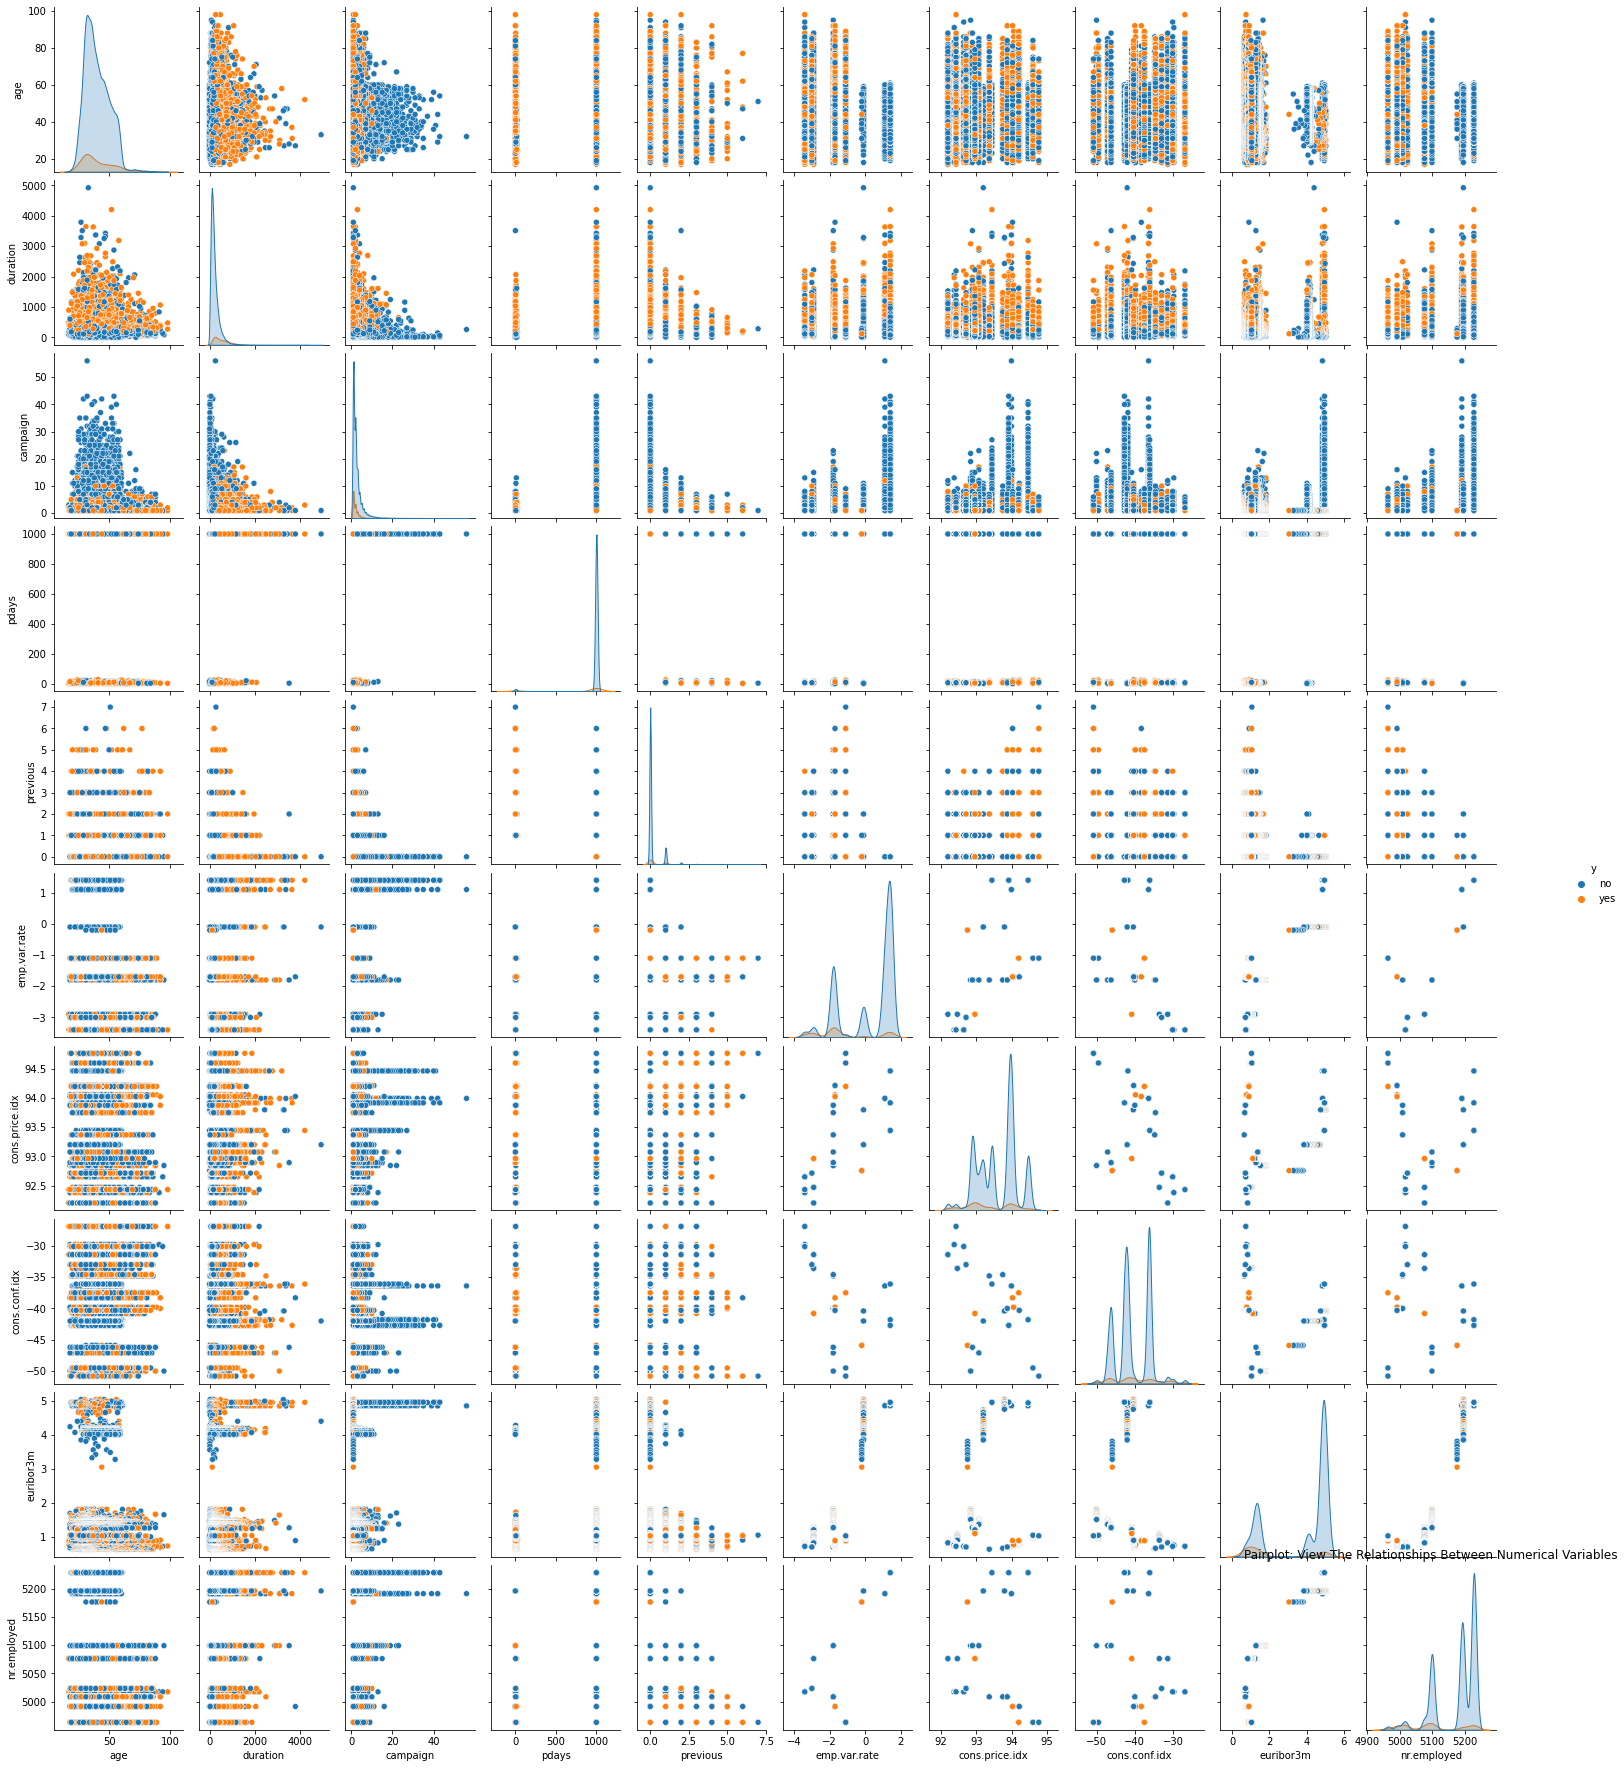

In [ ]:
# A creating a pair plot to see highlevel scatter plots to compare the distribution of pairs of numeric variables. We can see the histogram for each feature in the diagonal boxes

sns.pairplot(
    data=df, 
    aspect=.85,
    hue='y');
plt.title('Pairplot: View The Relationships Between Numerical Variables')    

Inadition to the correlations we saw in heatmap before, we can see how the outcome of the campaign aligned with each of these numerical variables. eg, we did have a low correlation between age and the campaign, but we we see no matter what the age of the customer, most success were from when fewer contacts made. On this other hand we can say more attempts were made to contact the customes who were not going to accept the offer anyway. 

Text(0, 0.5, 'Num of Days Passed')

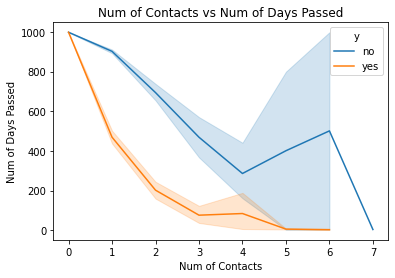

In [ ]:
sns.lineplot(x='previous', y='pdays', hue='y',data=df1).set(title='Num of Contacts vs Num of Days Passed')
plt.xlabel('Num of Contacts')
plt.ylabel('Num of Days Passed')

This graph shows further the last contact from previous campaign, more the possibility of customers accepting the new offer with fewer contacts.

Text(0, 0.5, 'Num of Employees')

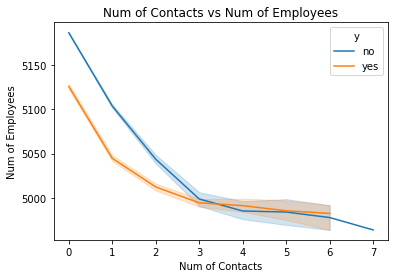

In [ ]:
sns.lineplot(x='previous', y='nr.employed', hue='y',data=df1).set(title='Num of Contacts vs Num of Employees')
plt.xlabel('Num of Contacts')
plt.ylabel('Num of Employees')

This graph shows bigger the company size, more the possibility of customers accepting the new offer with fewer contacts. 

Text(0, 0.5, 'Num of Employees')

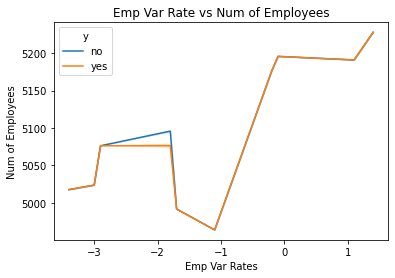

In [ ]:
sns.lineplot(x='emp.var.rate', y='nr.employed', hue='y',data=df1).set(title='Emp Var Rate vs Num of Employees')
plt.xlabel('Emp Var Rates')
plt.ylabel('Num of Employees')



2.  Categorical Variables




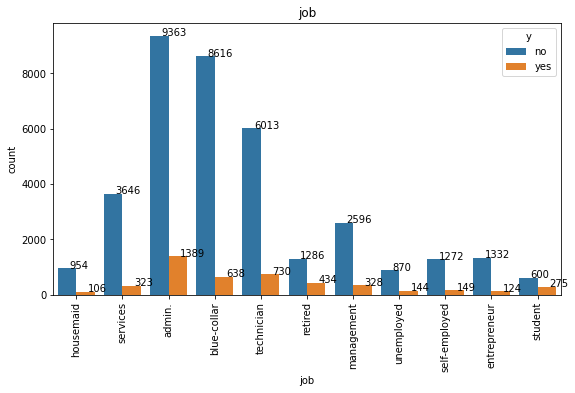

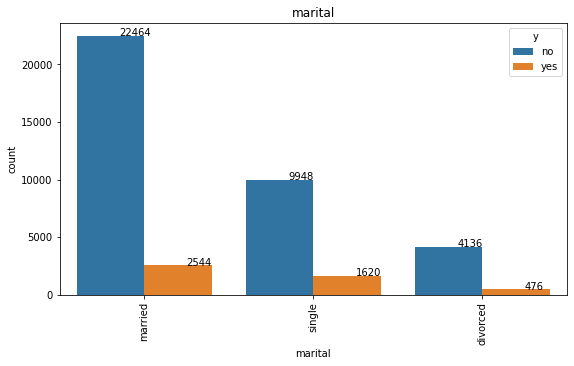

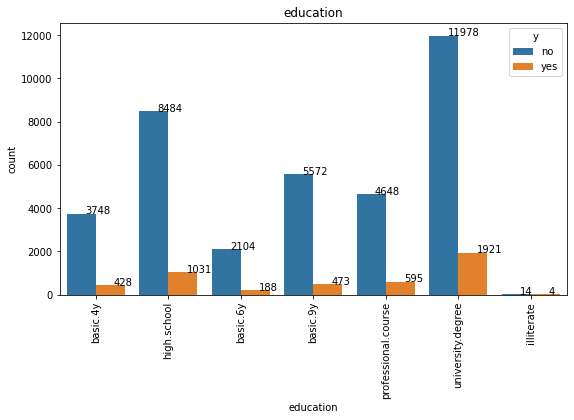

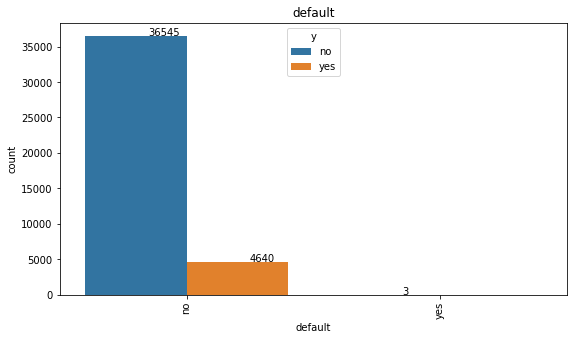

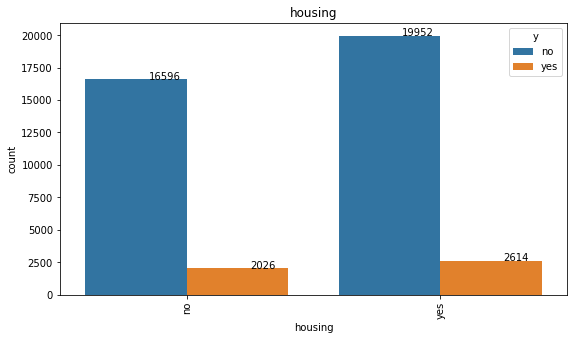

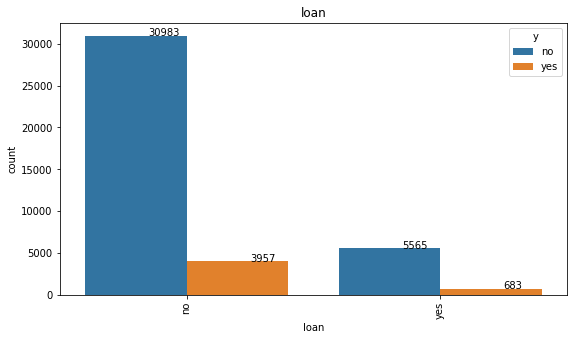

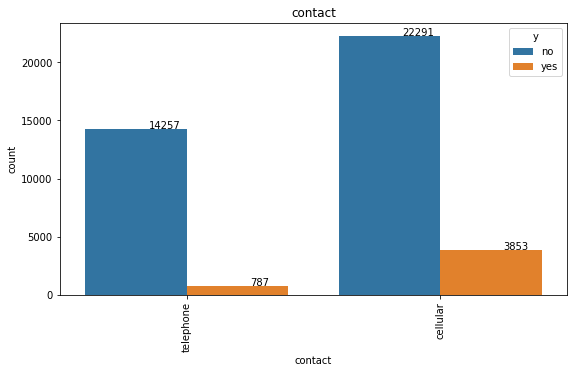

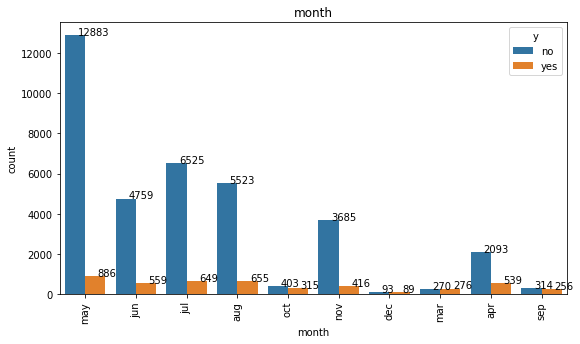

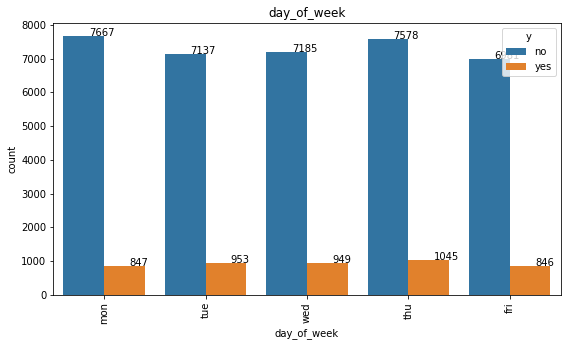

In [ ]:
df2=df1.drop('y', axis=1) # creating this temporary dataframe to remove the column y as we do not have to plot that.
categorical_columns_rev = df2.select_dtypes(include=['object']).columns
for col in categorical_columns_rev:# using df1 in this becase we do not want to see 'outcome' in this visualization
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    ax=sns.countplot(x=df1[col],hue=df1['y'],data=df1)
    plt.title(col)    
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


In [ ]:
df_job=df[['job','y']].value_counts()
df_job

job            y  
admin.         no     9363
blue-collar    no     8616
technician     no     6013
services       no     3646
management     no     2596
admin.         yes    1389
entrepreneur   no     1332
retired        no     1286
self-employed  no     1272
housemaid      no      954
unemployed     no      870
technician     yes     730
blue-collar    yes     638
student        no      600
retired        yes     434
management     yes     328
services       yes     323
student        yes     275
self-employed  yes     149
unemployed     yes     144
entrepreneur   yes     124
housemaid      yes     106
dtype: int64

In [ ]:
df_job1=df_job.unstack()
df_job1['accep_ratio']=(df_job1['yes']/(df_job1['yes']+df_job1['no'])).round(2)
df_job1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
job,,,
student,600,275,0.31
retired,1286,434,0.25
unemployed,870,144,0.14
admin.,9363,1389,0.13
management,2596,328,0.11
technician,6013,730,0.11
housemaid,954,106,0.10
self-employed,1272,149,0.10
entrepreneur,1332,124,0.09


In [ ]:
df_mar=df[['marital','y']].value_counts()
df_mar

marital   y  
married   no     22464
single    no      9948
divorced  no      4136
married   yes     2544
single    yes     1620
divorced  yes      476
dtype: int64

In [ ]:
df_mar1=df_mar.unstack()
df_mar1['accep_ratio']=(df_mar1['yes']/(df_mar1['yes']+df_mar1['no'])).round(2)
df_mar1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
marital,,,
single,9948,1620,0.14
divorced,4136,476,0.10
married,22464,2544,0.10


In [ ]:
df_edu=df[['education','y']].value_counts()
df_edu

education            y  
university.degree    no     11978
high.school          no      8484
basic.9y             no      5572
professional.course  no      4648
basic.4y             no      3748
basic.6y             no      2104
university.degree    yes     1921
high.school          yes     1031
professional.course  yes      595
basic.9y             yes      473
basic.4y             yes      428
basic.6y             yes      188
illiterate           no        14
                     yes        4
dtype: int64

In [ ]:
df_edu1=df_edu.unstack()
df_edu1['accep_ratio']=(df_edu1['yes']/(df_edu1['yes']+df_edu1['no'])).round(2)
df_edu1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
education,,,
illiterate,14,4,0.22
university.degree,11978,1921,0.14
high.school,8484,1031,0.11
professional.course,4648,595,0.11
basic.4y,3748,428,0.10
basic.6y,2104,188,0.08
basic.9y,5572,473,0.08


In [ ]:
df_hos=df[['housing','y']].value_counts()
df_hos

housing  y  
yes      no     19952
no       no     16596
yes      yes     2614
no       yes     2026
dtype: int64

In [ ]:
df_hos1=df_hos.unstack()
df_hos1['accep_ratio']=(df_hos1['yes']/(df_hos1['yes']+df_hos1['no'])).round(2)
df_hos1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
housing,,,
yes,19952,2614,0.12
no,16596,2026,0.11


In [ ]:
df_lon=df[['loan','y']].value_counts()
df_lon

loan  y  
no    no     30983
yes   no      5565
no    yes     3957
yes   yes      683
dtype: int64

In [ ]:
df_lon1=df_lon.unstack()
df_lon1['accep_ratio']=(df_lon1['yes']/(df_lon1['yes']+df_lon1['no'])).round(2)
df_lon1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
loan,,,
no,30983,3957,0.11
yes,5565,683,0.11


In [ ]:
df_mon=df[['month','y']].value_counts()
df_mon

month  y  
may    no     12883
jul    no      6525
aug    no      5523
jun    no      4759
nov    no      3685
apr    no      2093
may    yes      886
aug    yes      655
jul    yes      649
jun    yes      559
apr    yes      539
nov    yes      416
oct    no       403
       yes      315
sep    no       314
mar    yes      276
       no       270
sep    yes      256
dec    no        93
       yes       89
dtype: int64

In [ ]:
df_mon1=df_mon.unstack()
df_mon1['accep_ratio']=(df_mon1['yes']/(df_mon1['yes']+df_mon1['no'])).round(2)
df_mon1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
month,,,
mar,270,276,0.51
dec,93,89,0.49
sep,314,256,0.45
oct,403,315,0.44
apr,2093,539,0.20
aug,5523,655,0.11
jun,4759,559,0.11
nov,3685,416,0.10
jul,6525,649,0.09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

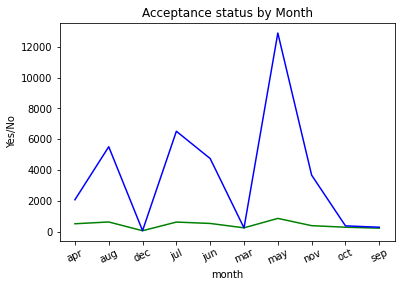

In [ ]:
sns.lineplot(x = "month", y = "yes", data = df_mon1, color = 'g' )
sns.lineplot(x = "month", y = "no", data = df_mon1, color = 'b')
plt.title('Acceptance status by Month')
plt.ylabel ('Yes/No')
plt.xticks(rotation = 25)

In [ ]:
df_day=df[['day_of_week','y']].value_counts()
df_day

day_of_week  y  
mon          no     7667
thu          no     7578
wed          no     7185
tue          no     7137
fri          no     6981
thu          yes    1045
tue          yes     953
wed          yes     949
mon          yes     847
fri          yes     846
dtype: int64

In [ ]:
df_day1=df_day.unstack()
df_day1['accep_ratio']=(df_day1['yes']/(df_day1['yes']+df_day1['no'])).round(2)
df_day1.sort_values(by='accep_ratio', ascending=False)

y,no,yes,accep_ratio
day_of_week,,,
thu,7578,1045,0.12
tue,7137,953,0.12
wed,7185,949,0.12
fri,6981,846,0.11
mon,7667,847,0.10


The common traits seen for customers who have subscribed for the term deposit are :This data set have more customers who does admin, blue-cllar, or technician jobs. however, when we analyze the ratio of accepting term depostis from last campaign, we can see that the campaign was more successful for customers who are either students or retired. when we look at marital status data, data set has higher customers under married category, but the single customers have highest acceptance ratio of the term deposits. In the education category higher number of customers in the data set and the 2nd highest number of acceptance ratio are both for the customers with university degree. However it is interesting to see there are 18 illiterate and they have higherst acceptance rate. This population has a higher number of customers that own houses, but the ratio of accepting term deposit has no significat diffrence. Contact month has no significan value for acceptance of the offer. However there has been ober 12k contacts in May which has resulted low acceptance rate in may, but the month has the highest number of acceptance. We do not see significance of the day of the week for the decision. 



Univarate analysis of categorical values

In [ ]:
#To understand the distribution of a single categorical value, we must first identify categorical features
cat_data = df.select_dtypes(exclude=np.number) # excluding data with numeric features
cat_col = cat_data.columns      # storing categorical features here

print("===="*50)
print("Categorical Features:")
print(cat_data.head())
print("===="*50) 

Categorical Features:
         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no  


(start of Cecilia's analysis - DELETE) Feature overviews - Checking Outcome Imbalance

In [ ]:
#calculates perceptages of 'yes' and no' in term deposit subscription from dataset
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
print(class_values)

no    88.73
yes   11.27
Name: y, dtype: float64


Illustrating the frequency of all categorical variables

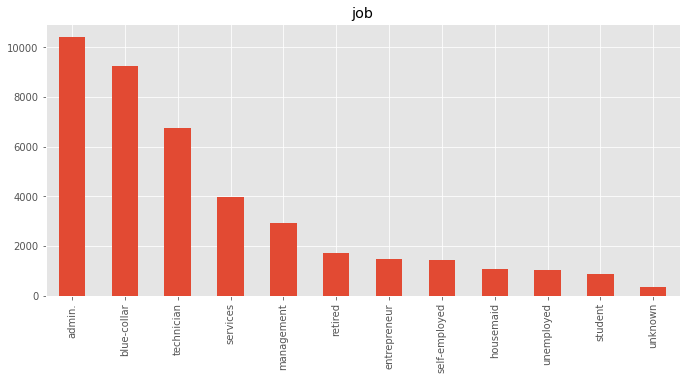

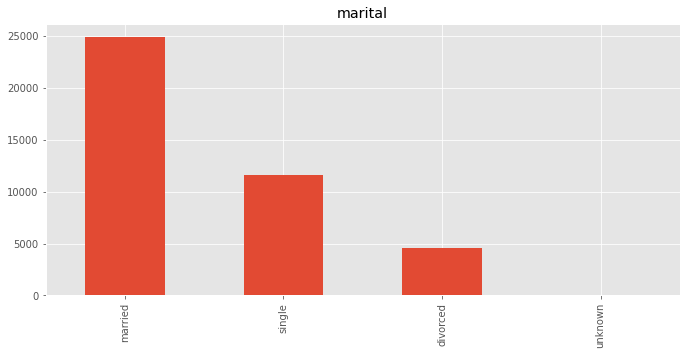

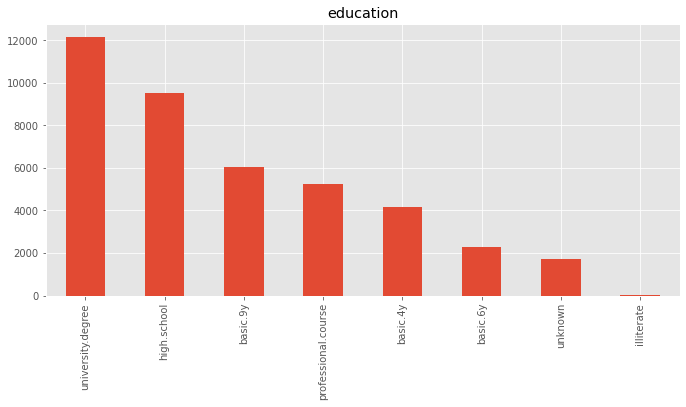

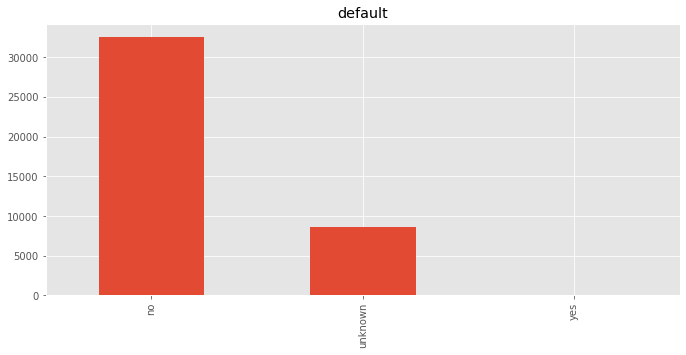

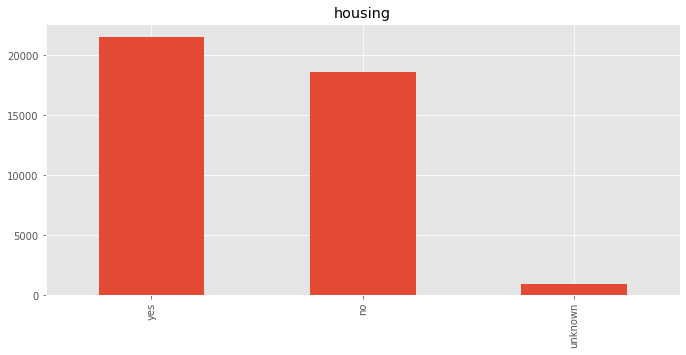

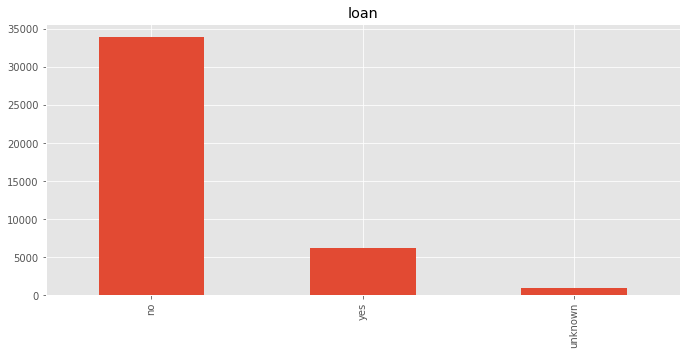

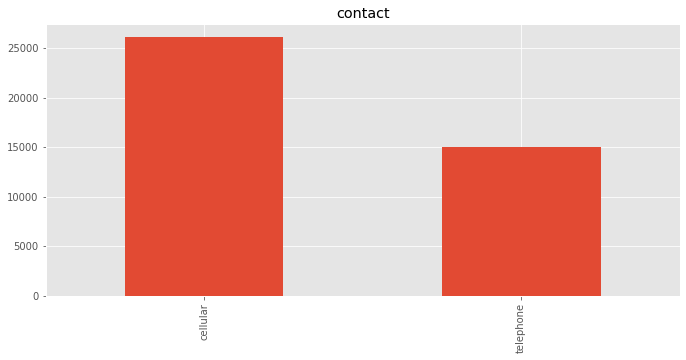

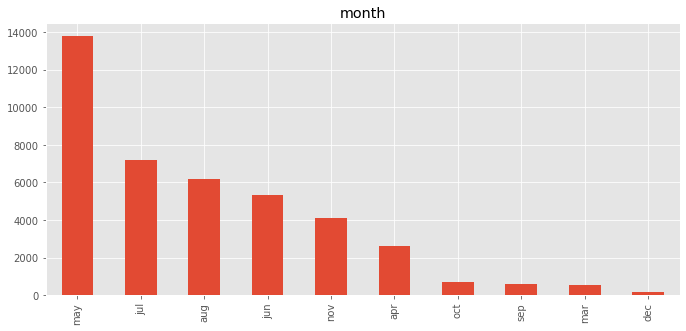

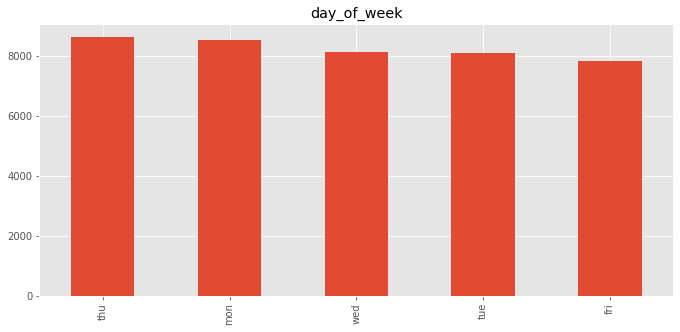

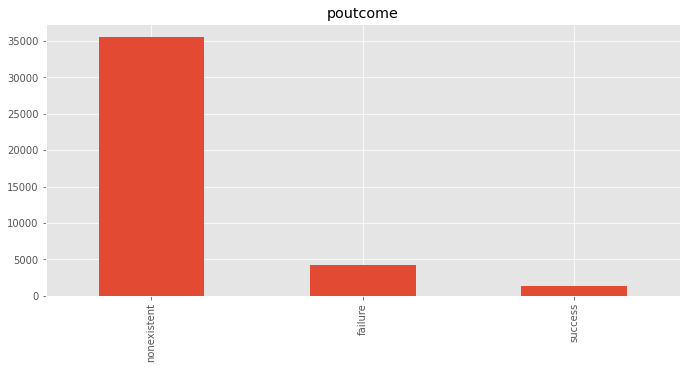

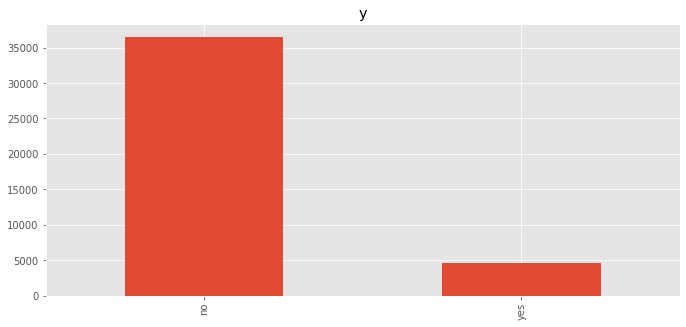

In [ ]:
# select all categorical values
cat_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in cat_col:
    plt.figure(figsize=(25,5))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

From analyizng and plotting data visually, we see that the majority of the customers are married. The top professions are blue-collar jobs, technicians, and administration - signialing a slightly below average income. This speculation on income level, coupled with the stronger presence in housing loan application compared to personal loan application could explain why there is a strong imbalance in the result columum as 'no'. Other interesting things to note are that a majority of customers were contacted in the month of May.

Analyzing distribution of categorical variables in respect to whether the client subscribed to the term deposit

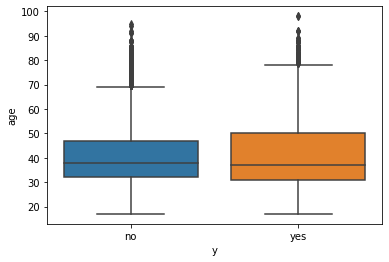

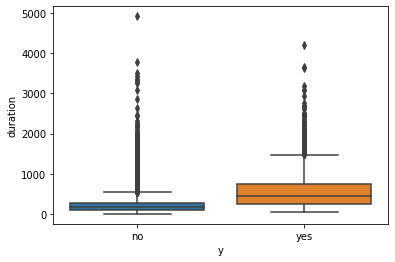

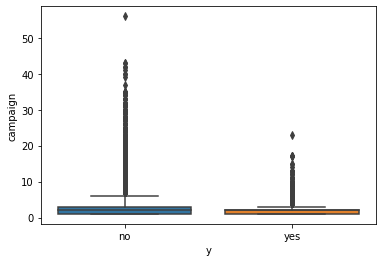

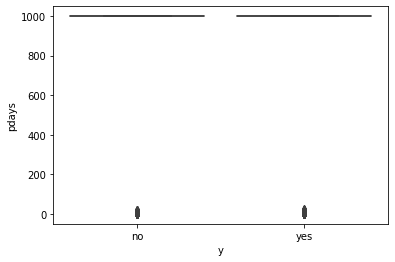

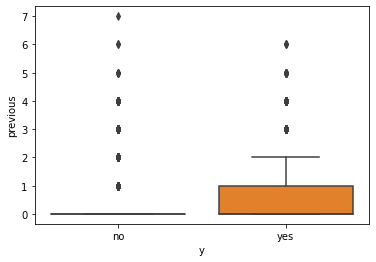

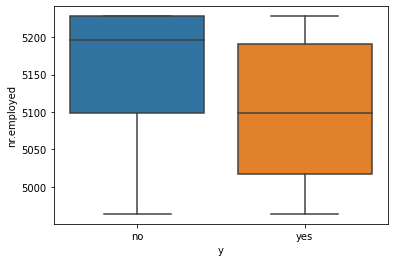

TypeError: ignored

In [ ]:
#select only the result 'y' column
y1 = df['y']

#create array of variable names
num_var = ["age","duration","campaign", "pdays", "previous", "nr.employed", 'education']

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

The average age is similar for clients who subscribed to term deposits vs not, though we are seeing a distribution that skews towards an older age for those that do. People who have subscribed also has held their bank account for a longer duration of time. This makes sense as customers need to build trust with bank advisors before committing their assets to an institution. Those that have subscribed to a term deposit also tend to have previously subscribed to term deposits as well. Interestingly, the outcome of subscription to term deposit is in inverse with education level and work experience - those who have more years of education tend not to subscribe. Perhaps this is due to having additional knowledge of investments, market performances, and financial literacy that enables the people to make more strategic decisions with their money. 

**Univariate analysis of continuous variables**

In [ ]:
numeric_data = df.select_dtypes(include=np.number)
numeric_columns = numeric_data.columns
numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

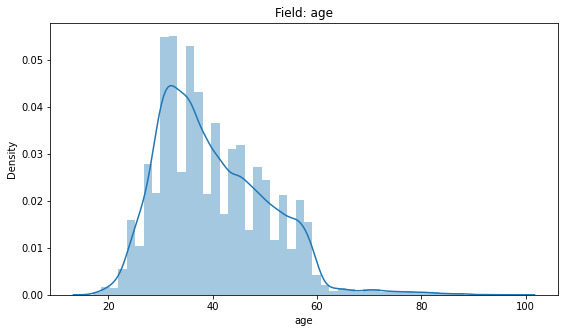

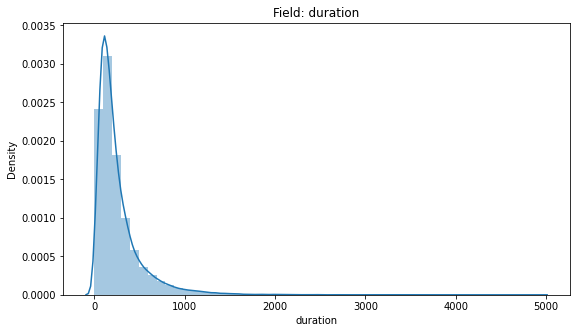

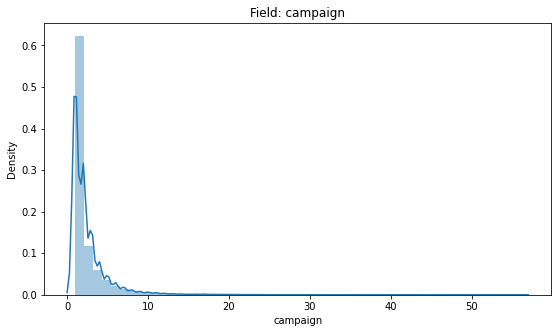

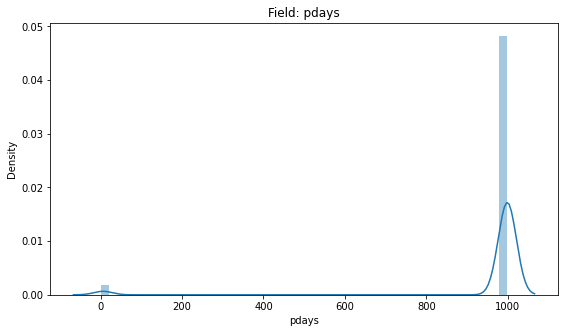

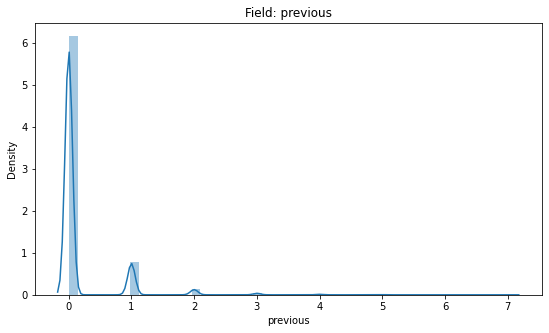

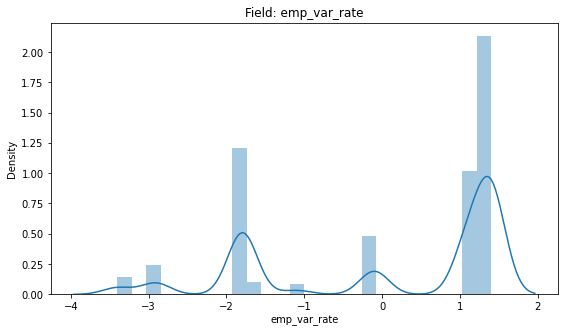

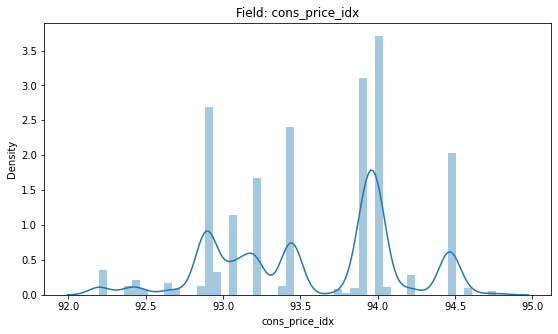

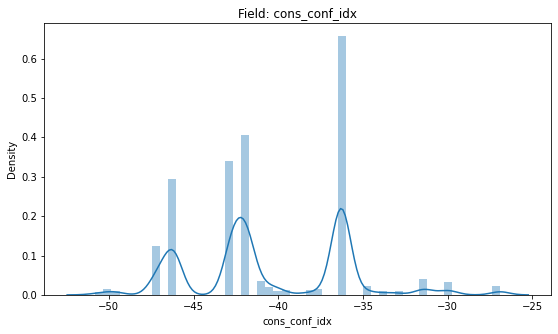

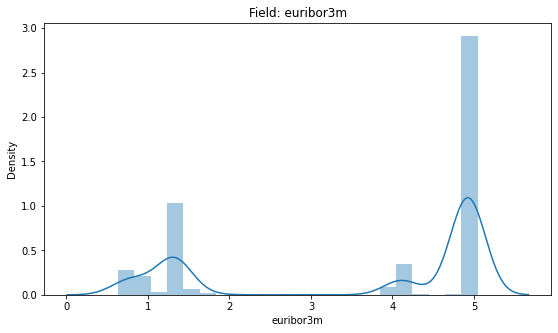

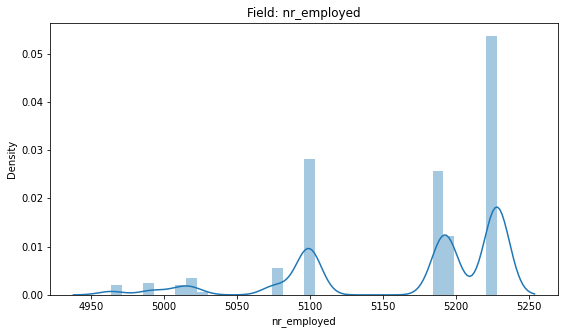

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title("Field: " + col)

**Analysis:**

Since these are continuous, numerical variables, we felt the best thing was to plot histograms to understand the distributions of each of these variables and analyze them statistically.

We observe that a plurality of the data points include people at age 30. The distribution of time spent is strongly right skewed, with about 200 being the most frequent duration found here in this dataset. Campaign is also most frequently 1, with again a right skewed distribution as is visible from the above histogram.

For pdays, looking at the histogram, we observe that almost all the values are just under 1000, making the guiding curve on the histogram a bit misleading. I think a bar graph alone would have been enough, and we would have seen the vast majority of the values there.

Things start to get a little different with fields such as emp_var_rate and contributions price. These fields are not obviously skewed distributions, but these also show more consistency with some of the values.
